In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os 
import warnings
warnings.filterwarnings("ignore")

###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 



In [2]:
# Fix parameters for building yield curve
yieldcurveconfig={
        "settlementDays": 2,
        "intpMethod": "LINEAR",
        "currency": "USD",
        "calendar": "UnitedStates",
        "dayCounter": "Actual360",
        "zeroRates": "USDZeroRates"
    }

In [3]:
yieldcurve =  {
    "valuationDate": "2021-06-02",
    "yieldCurve":yieldcurveconfig ,
    "yieldData": yielddata.to_dict('r')
}
try:
    result = api.createTask(CalculationType.YIELD_CURVE, yieldcurve,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()

In [4]:
zerorates=result.get("zeroRates"),
discountrates=result.get("discountRates")
dates=[]
forwarddates= {}
rhoovayieldcurvedicts = {}
rhoovayieldcurvediscounts = {}
for rhvzr in zerorates[0]:
    rhoovayieldcurvedicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')
    dates.append(rhvzr.get('date'))

for rhv in discountrates:
    rhoovayieldcurvediscounts[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')
    

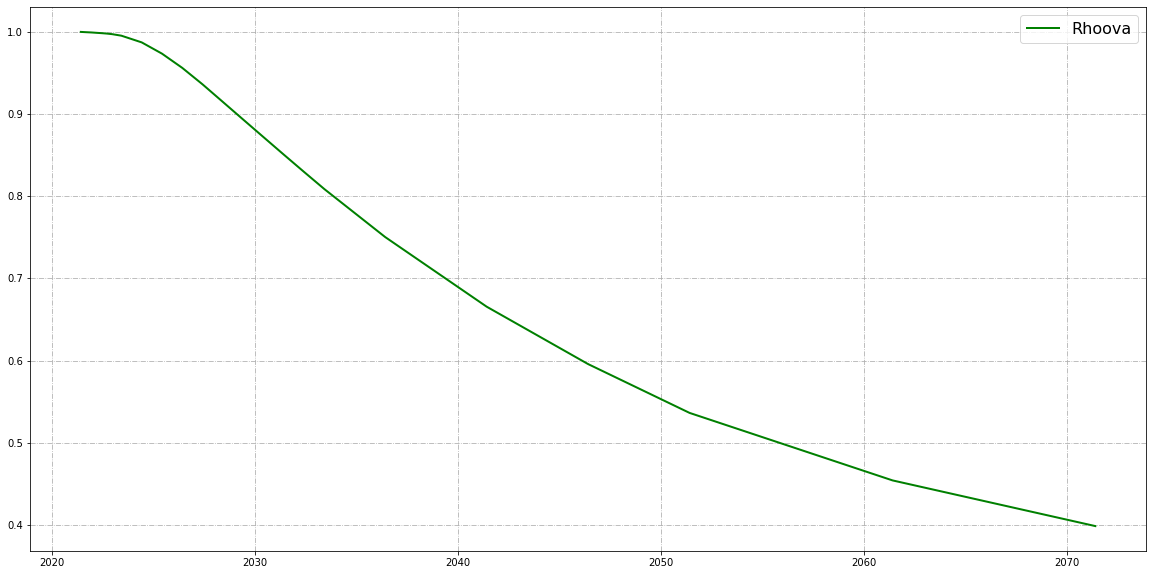

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y = list(rhoovayieldcurvediscounts.values())


ax.plot(x,y, 'g', label='Rhoova', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

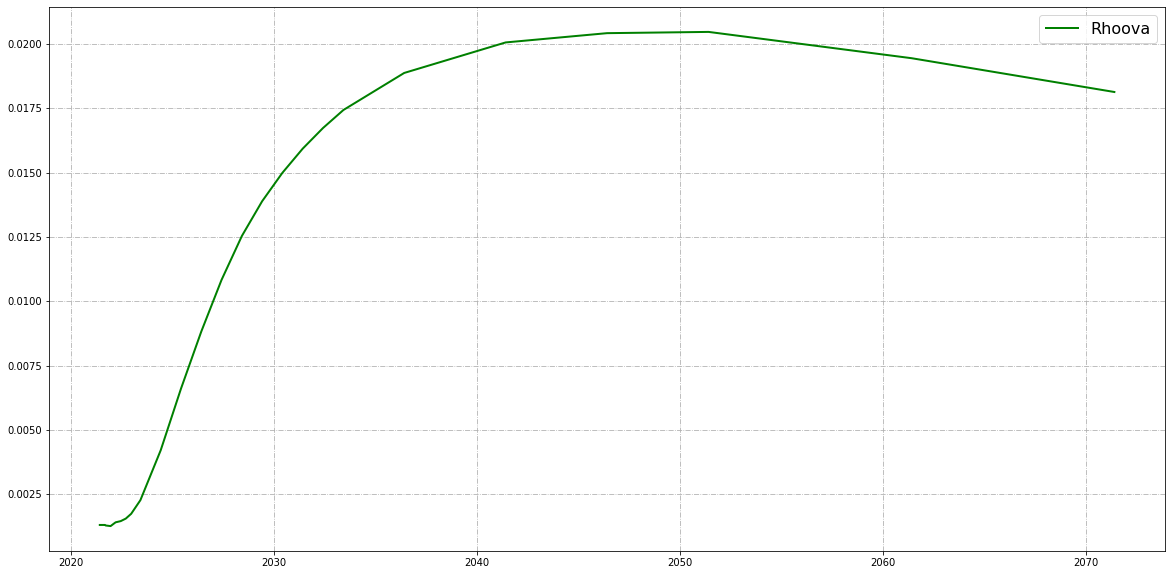

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y = list(rhoovayieldcurvedicts.values())


ax.plot(x,y, 'g', label='Rhoova', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [7]:
pTable = pt.PrettyTable(['Maturity','Rhoova ZeroRates','Rhoova Discount Rate'])
i=0
for key, val in rhoovayieldcurvedicts.items():
    pTable.add_row([key, val,rhoovayieldcurvediscounts.get(key)])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------------+----------------------+
|  Maturity  | Rhoova ZeroRates | Rhoova Discount Rate |
+------------+------------------+----------------------+
| 2021-06-04 |     0.001312     |          1           |
| 2021-09-07 |     0.001312     |       0.999654       |
| 2021-09-16 |     0.001293     |       0.999627       |
| 2021-12-15 |     0.001268     |       0.999317       |
| 2022-03-15 |     0.001415     |       0.998885       |
| 2022-06-16 |     0.001462     |       0.998470       |
| 2022-09-15 |     0.001560     |       0.997974       |
| 2022-12-21 |     0.001747     |       0.997262       |
| 2023-06-05 |     0.002277     |       0.995387       |
| 2024-06-04 |     0.004213     |       0.987255       |
| 2025-06-04 |     0.006606     |       0.973546       |
| 2026-06-04 |     0.008824     |       0.956231       |
| 2027-06-04 |     0.010832     |       0.936199       |
| 2028-06-05 |     0.012544     |       0.914727       |
| 2029-06-04 |     0.013891    